# Siddhant Tiwari

# To explore Business Analytics

Perform ‘Exploratory Data Analysis’ on the provided dataset ‘SampleSuperstore’

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df = pd.read_csv('SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


# Removing duplicates and null values

In [22]:
df.duplicated().sum()

17

In [28]:
df.drop_duplicates(keep = 'first', inplace = True)
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [29]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.000000,9977.00000
mean,55154.964117,230.148902,3.790719,0.156278,28.69013
std,32058.266816,623.721409,2.226657,0.206455,234.45784
min,1040.000000,0.444000,1.000000,0.000000,-6599.97800
25%,23223.000000,17.300000,2.000000,0.000000,1.72620
50%,55901.000000,54.816000,3.000000,0.200000,8.67100
75%,90008.000000,209.970000,5.000000,0.200000,29.37200
max,99301.000000,22638.480000,14.000000,0.800000,8399.97600


# Heatmap

In [32]:
corr = df.corr() 
corr               #dropping null values

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023476,0.013110,0.059225,-0.029892
Sales,-0.023476,1.000000,0.200722,-0.028311,0.479067
Quantity,0.013110,0.200722,1.000000,0.008678,0.066211
Discount,0.059225,-0.028311,0.008678,1.000000,-0.219662
Profit,-0.029892,0.479067,0.066211,-0.219662,1.000000


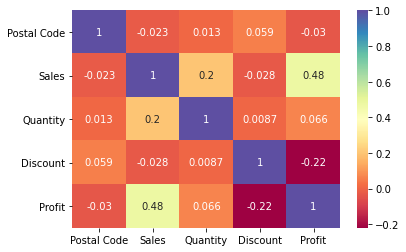

In [35]:
sns.heatmap(df.corr(),cmap='Spectral',annot = True)
plt.show()

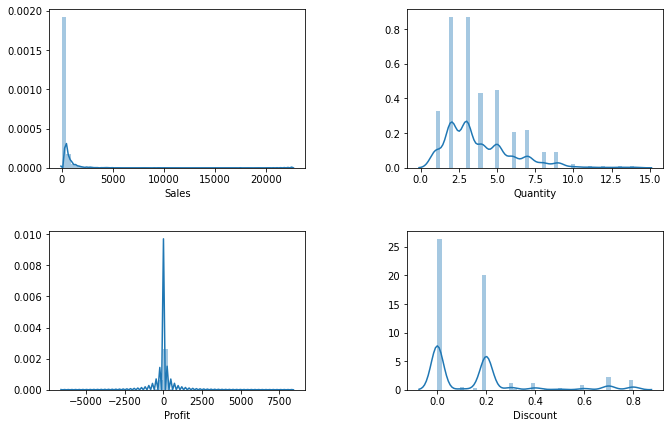

In [63]:
fig = plt.figure(figsize=(11,7))
fig.subplots_adjust(hspace=.4, wspace=.4)
ax = fig.add_subplot(2, 2, 1)
sns.distplot(df['Sales'],ax=ax)
ax = fig.add_subplot(2, 2, 2)
sns.distplot(df['Quantity'],ax=ax)
ax = fig.add_subplot(2, 2, 3)
sns.distplot(df['Profit'],ax=ax)
ax = fig.add_subplot(2, 2, 4)
sns.distplot(df['Discount'],ax=ax)
plt.show()

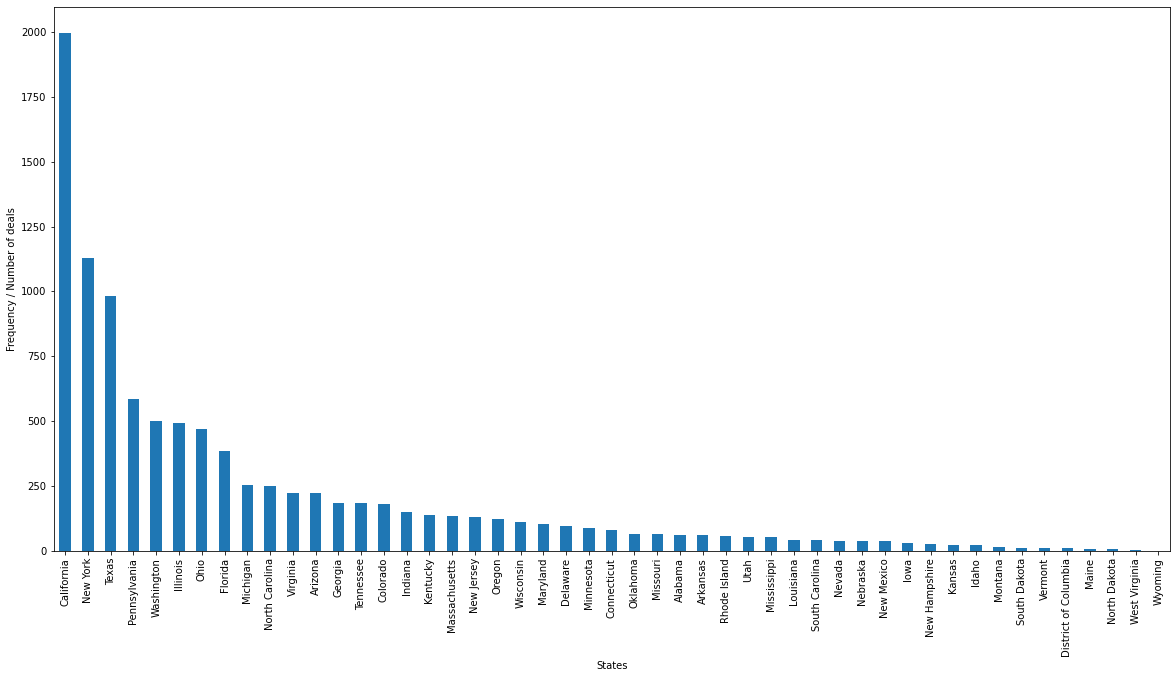

In [66]:
df['State'].value_counts().plot(kind='bar', figsize= (20,10))
plt.ylabel('Frequency / Number of deals')
plt.xlabel('States')
plt.show()

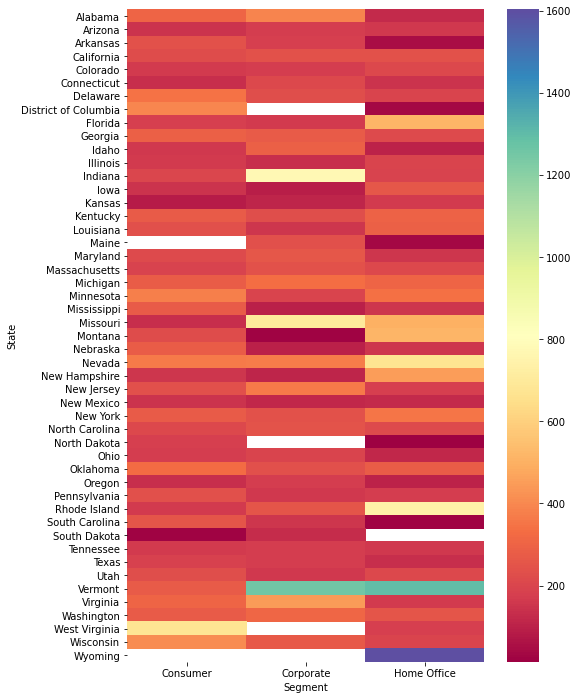

In [97]:
heatmap_sales = pd.pivot_table(df,values='Sales', index=["State"], columns='Segment')
plt.figure(figsize=(8, 12))
sns.heatmap(heatmap_sales,cmap='Spectral')
plt.show()

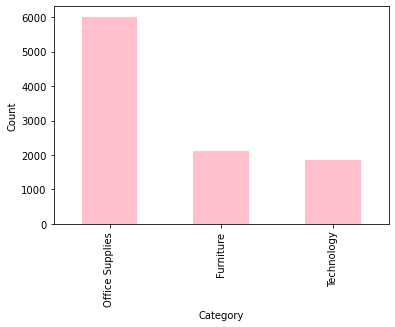

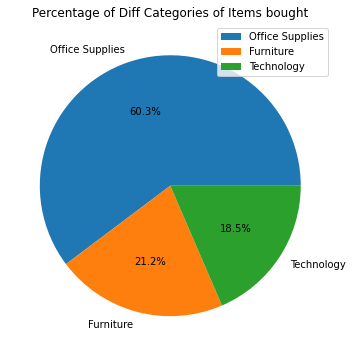

In [72]:
df['Category'].value_counts().plot(kind = 'bar', color= 'pink')
plt.xlabel('Category')
plt.ylabel('Count')
plt.figure(figsize=(6,6))
plt.pie(df['Category'].value_counts(),labels=df['Category'].value_counts().index,autopct='%1.1f%%')
plt.title('Percentage of Diff Categories of Items bought')
plt.legend()
plt.show()

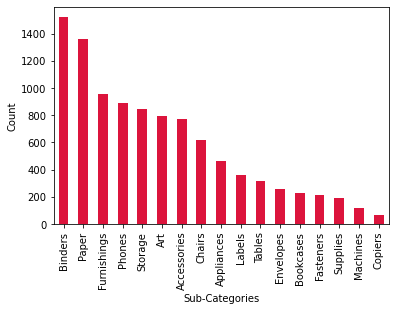

In [74]:
df['Sub-Category'].value_counts().plot(kind = 'bar', color= 'crimson')
plt.xlabel('Sub-Categories')
plt.ylabel('Count')
plt.show()

# Plot of different regions

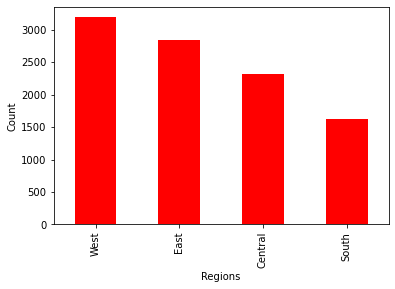

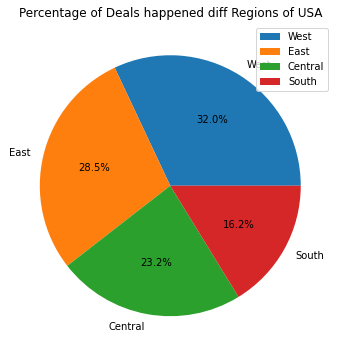

In [71]:
df['Region'].value_counts().plot(kind = 'bar', color= 'red')
plt.xlabel('Regions')
plt.ylabel('Count')
plt.figure(figsize=(6,6))
plt.pie(df['Region'].value_counts(),labels=df['Region'].value_counts().index,autopct='%1.1f%%')
plt.title('Percentage of Deals happened diff Regions of USA')
plt.legend()
plt.show()

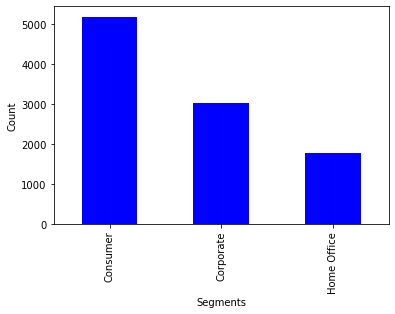

In [76]:
df['Segment'].value_counts().plot(kind = 'bar', color= 'blue')
plt.xlabel('Segments')
plt.ylabel('Count')
plt.show()

# Different items brought

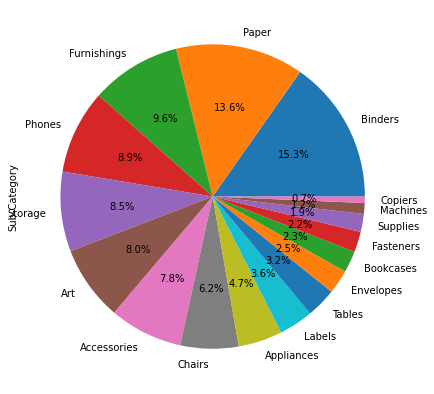

In [80]:
plt.figure(figsize=(11,7))
df["Sub-Category"].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()


# List of cities with maximum profit

In [81]:
top_cities=df.groupby('City')['Profit'].sum().reset_index().sort_values(by='Profit',ascending=False)
top_cities


,City,Profit
329,New York City,62013.8973
266,Los Angeles,30431.4267
452,Seattle,29121.6825
438,San Francisco,17466.1186
123,Detroit,13146.6935
...,...,...
80,Chicago,-6648.3318
241,Lancaster,-7239.0684
434,San Antonio,-7299.0502
207,Houston,-10175.1755


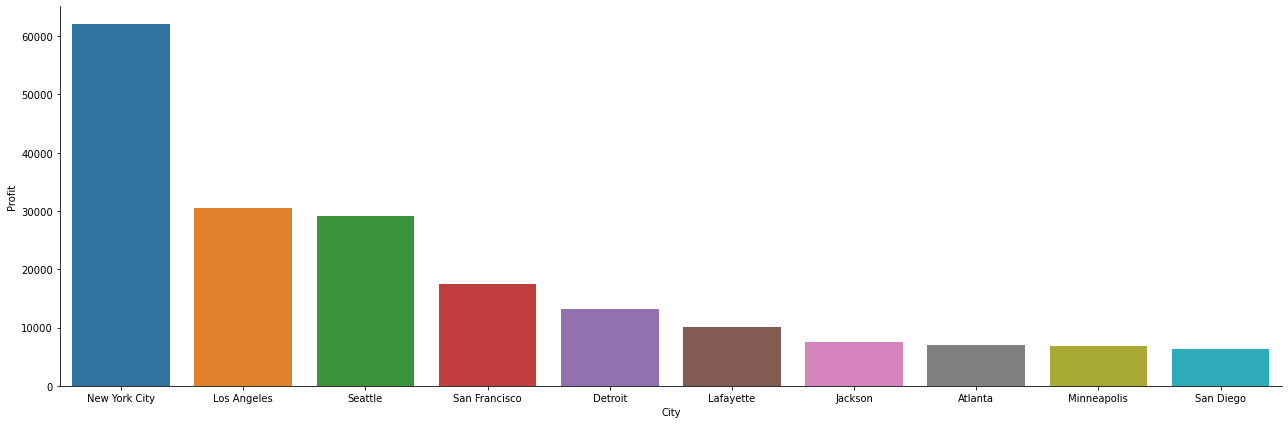

In [83]:
sns.catplot('City','Profit',data=top_cities.head(10),kind='bar',height=6,aspect=3)
plt.show()
